In [21]:
# !pip install datasets
# !pip install transformers==4.31.0
# !pip install -U accelerate
# !pip install optuna
# !pip install optuna-dashboard
# !pip install wandb -qU

In [2]:
import transformers

transformers.__version__

'4.31.0'

#Data

In [5]:
preprocessing_column = "Light Stemming"

In [6]:
import pickle

with open('train.pkl', 'rb') as f:
    X_train = pickle.load(f)

with open('test.pkl', 'rb') as f:
    X_test = pickle.load(f)

with open('val.pkl', 'rb') as f:
    X_dev = pickle.load(f)

In [7]:
label_to_class = {
    0: 'none',
    1: 'anger',
    2: 'joy',
    3: 'sadness',
    4: 'love',
    5: 'sympathy',
    6: 'surprise',
    7: 'fear'
}

classes = ['none', 'anger', 'joy', 'sadness', 'love', 'sympathy', 'surprise', 'fear']

In [8]:
X_train.head()

,tweet,label,tweet_with_replaced_emojis,cleaned_data_with_replaced_emojis,Light Stemming
5081,1996 يا مهند ياحبيبي انت تدور لبش مع اي احد ...,1,1996 يا مهند ياحبيبي انت تدور لبش مع اي احد ...,يامهند ياحبيبي تدور لبش اي احد متاكد ابو جاسم ...,يامهند ياحبيبي تدور لبش اي احد متاكد ابو جاسم ...
8264,حلب عفرين اعتقال عشرات الشباب من قريه باسوطه ...,3,حلب عفرين اعتقال عشرات الشباب من قريه باسوطه ...,حلب عفرين اعتقال عشرات الشباب قريه باسوطه ريف ...,حلب عفر اعتقال عشر الشباب قريه باسوطه ريف عفر ...
9777,انا نفسي مره اجرب اكون ليك حد اقرب : ),3,انا نفسي مره اجرب اكون ليك حد اقرب : ),مره اجرب اكون ليك اقرب,مره اجرب اكون ليك اقرب
740,الصراحه احساس مخزي ونحن نكتفي بالتمثيل المشرف ...,3,الصراحه احساس مخزي ونحن نكتفي بالتمثيل المشرف ...,الصراحه احساس مخزي نكتفي بالتمثيل المشرف الاول...,الصراحه احساس مخزي نكتفي بالتمثيل المشرف الاول...
6537,57 عاجل الايطالي فابيو باسل يفوز بدهب الاولي...,0,57 عاجل الايطالي فابيو باسل يفوز بدهب الاولي...,عاجل الايطالي فابيو باسل يفوز بدهب الاوليمبياد...,عاجل الايطالي فابيو باسل يفوز بدهب الاوليمبياد...


In [9]:
X_train = X_train[['tweet', preprocessing_column, 'label']]
y_train = X_train['label']
X_test = X_test[['tweet', preprocessing_column, 'label']]
y_test = X_test['label']
X_dev = X_dev[['tweet', preprocessing_column, 'label']]
y_dev = X_dev['label']

In [10]:
X_train.shape, X_test.shape, X_dev.shape

((7045, 3), (1510, 3), (1510, 3))

In [11]:
X_train

,tweet,Light Stemming,label
5081,1996 يا مهند ياحبيبي انت تدور لبش مع اي احد ...,يامهند ياحبيبي تدور لبش اي احد متاكد ابو جاسم ...,1
8264,حلب عفرين اعتقال عشرات الشباب من قريه باسوطه ...,حلب عفر اعتقال عشر الشباب قريه باسوطه ريف عفر ...,3
9777,انا نفسي مره اجرب اكون ليك حد اقرب : ),مره اجرب اكون ليك اقرب,3
740,الصراحه احساس مخزي ونحن نكتفي بالتمثيل المشرف ...,الصراحه احساس مخزي نكتفي بالتمثيل المشرف الاول...,3
6537,57 عاجل الايطالي فابيو باسل يفوز بدهب الاولي...,عاجل الايطالي فابيو باسل يفوز بدهب الاوليمبياد...,0
...,...,...,...
5734,احمد الاحمر اوحش لاعب في الاوليمبياد ... اخره ...,احمد الاحمر اوحش لاعب الاوليمبياد اخره تضخيم ا...,3
5191,انتي كان قصدك عليا !,انتي قصدك عليا,6
5390,يا جدعان لو سمحتوا مش كل واحد عنده ميتين ام عق...,جدع سمحت مش واحد ميت ام عقده نفسيه يروح داخل ش...,1
860,هتودينا في دهيا يا بلال ارحمنا ده مش وقت قلش,هتودي دهيا يابلال ارحم مش قلش,1


In [12]:
X_train = X_train.rename_axis('id')
X_test = X_test.rename_axis('id')
X_dev = X_dev.rename_axis('id')

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
X_dev = X_dev.reset_index(drop=True)

In [13]:
from datasets import Dataset

X_train = Dataset.from_pandas(X_train)
X_test = Dataset.from_pandas(X_test)
X_dev = Dataset.from_pandas(X_dev)
X_train, X_test, X_dev

(Dataset({
     features: ['tweet', 'Light Stemming', 'label'],
     num_rows: 7045
 }),
 Dataset({
     features: ['tweet', 'Light Stemming', 'label'],
     num_rows: 1510
 }),
 Dataset({
     features: ['tweet', 'Light Stemming', 'label'],
     num_rows: 1510
 }))

#Transformer

##Setup

In [14]:
model_checkpoint = 'UBC-NLP/MARBERTv2'

In [15]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(model_checkpoint, use_fast=True)

In [16]:
def tokenize_function(examples):
    return tokenizer(examples[preprocessing_column], padding="max_length", truncation=True, max_length=37)

X_train = X_train.map(tokenize_function, batched=True, num_proc = 8)
X_dev = X_test.map(tokenize_function, batched=True, num_proc = 8)
X_test = X_test.map(tokenize_function, batched=True, num_proc = 8)

Map (num_proc=8):   0%|          | 0/7045 [00:00<?, ? examples/s]

Map (num_proc=8):   0%|          | 0/1510 [00:00<?, ? examples/s]

Map (num_proc=8):   0%|          | 0/1510 [00:00<?, ? examples/s]

##Model

###Train

In [17]:
import numpy as np
from sklearn.metrics import (accuracy_score,
                             f1_score,
                             precision_score,
                             recall_score
                             )

def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=1)
    assert len(preds) == len(p.label_ids)

    macro_f1 = f1_score(p.label_ids,preds,average='macro', zero_division=1)
    macro_precision = precision_score(p.label_ids,preds,average='macro', zero_division=1)
    macro_recall = recall_score(p.label_ids,preds,average='macro', zero_division=1)
    acc = accuracy_score(p.label_ids,preds)
    return {
      'macro_f1' : macro_f1,
      'macro_precision': macro_precision,
      'macro_recall': macro_recall,
      'accuracy': acc
    }

In [24]:
import wandb

wandb.login(key="your key")

wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [26]:
import os

# set the wandb project where this run will be logged
os.environ["WANDB_PROJECT"]="emotion_sentiment_analysis"

# save your trained model checkpoint to wandb
os.environ["WANDB_LOG_MODEL"]="true"

# turn off watch to log faster
os.environ["WANDB_WATCH"]="false"

In [27]:
import optuna
from transformers import TrainingArguments, Trainer, EarlyStoppingCallback
from transformers import AutoModelForSequenceClassification
from torch.optim import AdamW


def objective(trial: optuna.Trial):
    model = AutoModelForSequenceClassification.from_pretrained(model_checkpoint, num_labels=8)
    # optimizer = AdamW(model.parameters(), lr=1e-5)
    training_args = TrainingArguments(
        output_dir="./train",
        learning_rate=trial.suggest_float("learning_rate", low=1e-5, high=5e-5, log=True),
        # learning_rate = 5.9572096694887074e-05,
        weight_decay=trial.suggest_float("weight_decay", 0.0, 0.1),
        num_train_epochs=trial.suggest_int("num_train_epochs", low=1, high=5),
        # num_train_epochs=4,
        per_device_train_batch_size=trial.suggest_categorical("per_device_train_batch_size", [16, 32]),
        # per_device_train_batch_size=16,
        per_device_eval_batch_size=16,
        # seed = 34,
        seed=trial.suggest_int("seed", 10, 35),
        logging_steps = 100,
        load_best_model_at_end=True,
        evaluation_strategy="steps",
        metric_for_best_model = 'macro_f1', # relative to training metrics to prevent overfitting
        report_to="wandb"
    )
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=X_train,
        eval_dataset=X_dev,
        compute_metrics=compute_metrics,
        # optimizers=(optimizer, None)
    )
    result = trainer.train()
    metrics = trainer.evaluate()
    return metrics["eval_macro_f1"], result.training_loss

In [28]:
# Run optimization
storage = optuna.storages.InMemoryStorage()
study = optuna.create_study(storage=storage,
                            study_name="hyper-parameter-search",
                            directions=["maximize", "minimize"],
                            pruner=optuna.pruners.HyperbandPruner())
study.optimize(objective, n_trials=2)

wandb.finish()

[I 2023-08-24 03:07:03,331] A new study created in memory with name: hyper-parameter-search


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at UBC-NLP/MARBERTv2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


wandb: Currently logged in as: ahmedtawfiiiq (emotion_justification). Use `wandb login --relogin` to force relogin


Step,Training Loss,Validation Loss,Macro F1,Macro Precision,Macro Recall,Accuracy
100,1.759500,1.409956,0.475978,0.589979,0.557072,0.577483
200,1.231100,1.026600,0.653059,0.699288,0.674677,0.686093
300,0.952800,0.900137,0.709928,0.723287,0.713494,0.719868
400,0.859800,0.840386,0.727730,0.744161,0.727533,0.734437
500,0.754700,0.813644,0.743795,0.758315,0.744139,0.750993
600,0.699300,0.804361,0.744317,0.756518,0.744379,0.750331
700,0.631300,0.795962,0.740585,0.749965,0.741613,0.747682
800,0.609000,0.788626,0.745915,0.753729,0.745831,0.750993


[I 2023-08-24 03:11:53,210] Trial 0 finished with values: [0.7437954737597776, 0.9034952232740584] and parameters: {'learning_rate': 1.4224112391242973e-05, 'weight_decay': 0.01801974924723373, 'num_train_epochs': 4, 'per_device_train_batch_size': 32, 'seed': 16}. 
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at UBC-NLP/MARBERTv2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss,Validation Loss,Macro F1,Macro Precision,Macro Recall,Accuracy
100,1.524600,1.073174,0.620317,0.714155,0.646358,0.662252
200,1.011600,0.894442,0.694221,0.724883,0.699825,0.709934
300,0.892200,0.875493,0.699952,0.731653,0.698728,0.707947
400,0.853800,0.798247,0.735523,0.760420,0.738484,0.745695
500,0.689700,0.785836,0.738969,0.748513,0.737441,0.743046
600,0.606600,0.809940,0.740554,0.745941,0.739429,0.743046
700,0.557100,0.775436,0.741922,0.753699,0.738817,0.742384
800,0.588400,0.784856,0.744455,0.757740,0.744492,0.747020
900,0.471800,0.832488,0.749202,0.760362,0.750338,0.754967
1000,0.324200,0.909056,0.746589,0.748602,0.746199,0.747020


[I 2023-08-24 03:20:01,977] Trial 1 finished with values: [0.7470059920759964, 0.44149693977805765] and parameters: {'learning_rate': 3.910335149933312e-05, 'weight_decay': 0.03677111553512169, 'num_train_epochs': 5, 'per_device_train_batch_size': 16, 'seed': 28}. 


eval/accuracy,▁▅▇▇█████▄▆▆████████▇████▇▇█████
eval/loss,█▄▂▂▁▁▁▁▁▄▂▂▁▁▁▁▁▂▂▂▃▃▄▄▅▅▆▆▆▇▇▆
eval/macro_f1,▁▆▇▇█████▅▇▇████████████████████
eval/macro_precision,▁▅▆▇█████▆▇▇██▇█████▇██▇▇▇▇▇█▇▇█
eval/macro_recall,▁▅▇▇█████▄▆▆████████████████████
eval/runtime,▂▁▇▅▃▅▃▃▄▅▃▂▄▃▄▃▃▄▄▅▄▃▃▅▅▄▃▃▄▄▄█
eval/samples_per_second,▇█▂▄▆▄▆▆▅▄▆▆▅▆▅▆▅▄▅▄▅▆▆▄▃▅▆▆▅▅▅▁
eval/steps_per_second,▇█▂▄▆▄▆▆▅▄▆▆▅▆▅▆▅▄▅▄▅▆▆▄▃▅▆▆▅▅▅▁
train/epoch,▁▁▂▃▃▄▄▅▅▆▇▇▁▁▂▂▂▂▃▃▃▃▄▄▄▅▅▅▅▆▆▆▆▇▇▇████
train/global_step,▁▁▁▂▂▂▂▃▃▃▄▄▁▁▂▂▂▂▃▃▃▃▄▄▄▅▅▅▅▆▆▆▆▇▇▇████
train/learning_rate,▃▃▃▂▂▂▂▁██▇▇▇▆▆▆▅▅▅▄▄▄▃▃▃▂▂▂▁▁


In [29]:
import optuna
import threading
from google.colab import output
from optuna_dashboard import run_server

# Start Optuna Dashboard
port = 8090
thread = threading.Thread(target=run_server, args=(storage,), kwargs={"port": port})
thread.start()
output.serve_kernel_port_as_window(port, path='/dashboard/')

Bottle v0.12.25 server starting up (using WSGIRefServer())...
Listening on http://localhost:8090/
Hit Ctrl-C to quit.



<IPython.core.display.Javascript object>

###Best Parameters

In [30]:
print(study.best_trials[0].params)

{'learning_rate': 3.910335149933312e-05, 'weight_decay': 0.03677111553512169, 'num_train_epochs': 5, 'per_device_train_batch_size': 16, 'seed': 28}


In [31]:
model = AutoModelForSequenceClassification.from_pretrained(model_checkpoint, num_labels=8)
training_args = TrainingArguments(output_dir="./results",
                                  logging_steps = 100,
                                  evaluation_strategy="steps")
trainer = Trainer(model=model,
                  args=training_args,
                  train_dataset=X_train,
                  eval_dataset=X_dev,
                  compute_metrics=compute_metrics)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at UBC-NLP/MARBERTv2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [32]:
for n, v in study.best_trials[0].params.items():
    setattr(trainer.args, n, v)

trainer.train()

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Step,Training Loss,Validation Loss,Macro F1,Macro Precision,Macro Recall,Accuracy
100,1.559100,1.172845,0.577206,0.679949,0.598976,0.617219
200,0.991600,0.879727,0.700188,0.723612,0.700566,0.709272
300,0.883200,0.819969,0.718326,0.728648,0.722332,0.727152
400,0.848700,0.771384,0.741327,0.743942,0.740025,0.741060
500,0.637700,0.802520,0.744773,0.749427,0.745439,0.749007
600,0.562200,0.794675,0.743160,0.754362,0.740469,0.745033
700,0.559400,0.813206,0.740661,0.748018,0.738761,0.741722
800,0.556300,0.793283,0.751970,0.754511,0.750832,0.752318
900,0.542700,0.821519,0.734006,0.740363,0.733246,0.731126
1000,0.338700,0.921623,0.732654,0.756509,0.729539,0.735762


TrainOutput(global_step=2205, training_loss=0.42927900816476533, metrics={'train_runtime': 494.5884, 'train_samples_per_second': 71.221, 'train_steps_per_second': 4.458, 'total_flos': 669800175442800.0, 'train_loss': 0.42927900816476533, 'epoch': 5.0})

In [33]:
trainer.evaluate()

{'eval_loss': 1.2729406356811523,
 'eval_macro_f1': 0.7385782601219473,
 'eval_macro_precision': 0.7413537940410229,
 'eval_macro_recall': 0.7383572478144302,
 'eval_accuracy': 0.7390728476821192,
 'eval_runtime': 4.971,
 'eval_samples_per_second': 303.76,
 'eval_steps_per_second': 38.02,
 'epoch': 5.0}

###Evaluate

####Test Data

In [34]:
import torch

batch_size = 16

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [35]:
from torch.utils.data import TensorDataset, DataLoader

input_ids = [i['input_ids'] for i in X_test]
attention_masks = [i['attention_mask'] for i in X_test]

inputs = torch.tensor(input_ids)
masks = torch.tensor(attention_masks)
test_data = TensorDataset(inputs, masks)

test_dataloader = DataLoader(test_data, batch_size=batch_size)

In [36]:
from sklearn.metrics import classification_report

model = trainer.model
model.eval()
model.to(device)

test_pred = []
for input, masks in test_dataloader:
    torch.cuda.empty_cache()

    input = input.to(device)
    masks = masks.to(device)

    output = model(input, attention_mask=masks)['logits']
    predictions = torch.argmax(output, dim=1)
    predictions = predictions.cpu().detach().numpy()

    test_pred.extend(predictions)

print(classification_report(X_test['label'], test_pred, target_names=classes))

              precision    recall  f1-score   support

        none       0.70      0.80      0.75       229
       anger       0.76      0.69      0.72       200
         joy       0.66      0.58      0.62       205
     sadness       0.60      0.67      0.63       185
        love       0.80      0.79      0.79       193
    sympathy       0.90      0.88      0.89       156
    surprise       0.59      0.56      0.58       154
        fear       0.93      0.94      0.93       188

    accuracy                           0.74      1510
   macro avg       0.74      0.74      0.74      1510
weighted avg       0.74      0.74      0.74      1510



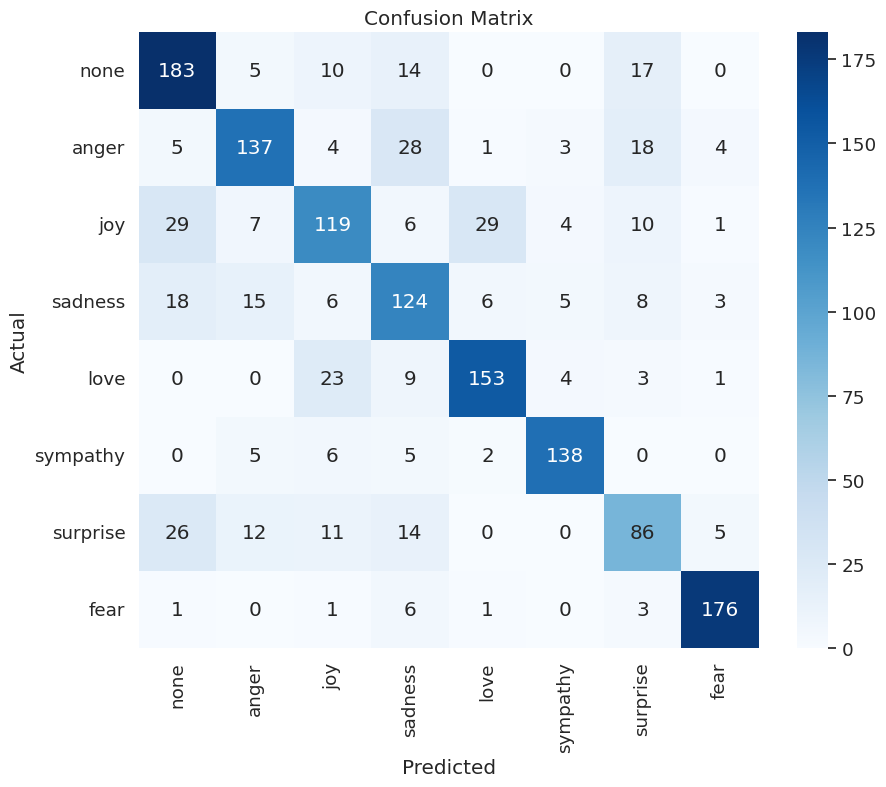

In [37]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(X_test['label'], test_pred)

plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

####Train Data

In [38]:
from torch.utils.data import TensorDataset, DataLoader

input_ids = [i['input_ids'] for i in X_train]
attention_masks = [i['attention_mask'] for i in X_train]

inputs = torch.tensor(input_ids)
masks = torch.tensor(attention_masks)
train_data = TensorDataset(inputs, masks)

train_dataloader = DataLoader(train_data, batch_size=batch_size)

In [39]:
from sklearn.metrics import classification_report

model = trainer.model
model.eval()
model.to(device)

train_pred = []
for input, masks in train_dataloader:
    torch.cuda.empty_cache()

    input = input.to(device)
    masks = masks.to(device)

    output = model(input, attention_mask=masks)['logits']
    predictions = torch.argmax(output, dim=1)
    predictions = predictions.cpu().detach().numpy()

    train_pred.extend(predictions)

print(classification_report(X_train['label'], train_pred, target_names=classes))

              precision    recall  f1-score   support

        none       0.98      0.99      0.99      1074
       anger       0.99      0.99      0.99      1019
         joy       0.99      0.99      0.99       891
     sadness       0.99      0.98      0.99       885
        love       1.00      0.99      0.99       850
    sympathy       0.99      0.99      0.99       755
    surprise       0.98      0.98      0.98       729
        fear       0.99      0.99      0.99       842

    accuracy                           0.99      7045
   macro avg       0.99      0.99      0.99      7045
weighted avg       0.99      0.99      0.99      7045



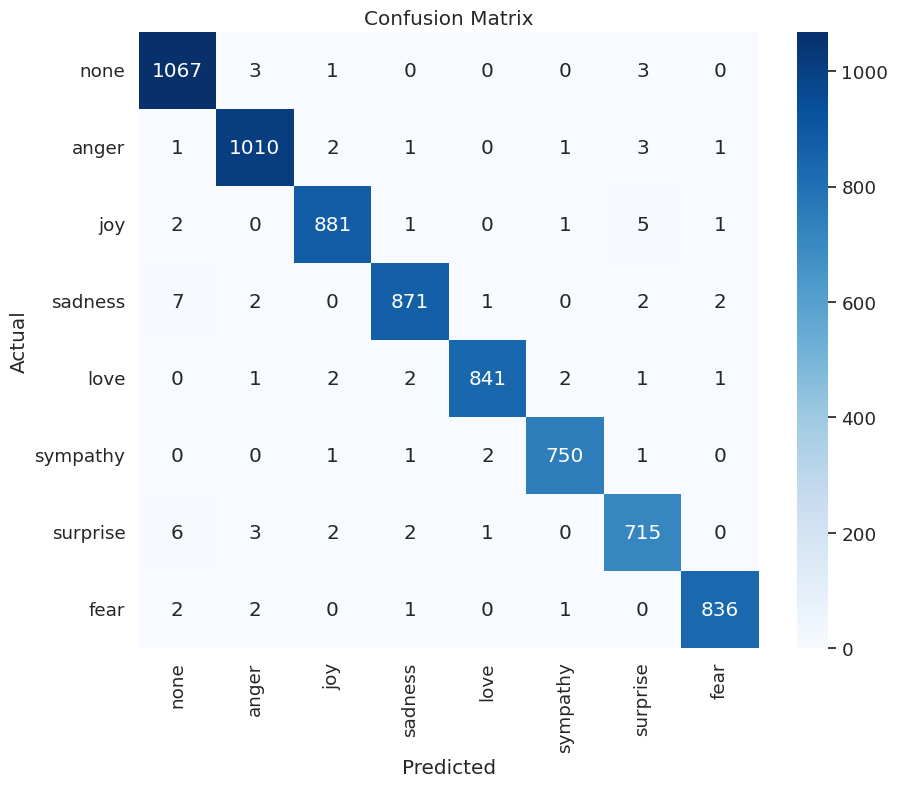

In [40]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(X_train['label'], train_pred)

plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

####Dev Data

In [41]:
from torch.utils.data import TensorDataset, DataLoader

input_ids = [i['input_ids'] for i in X_dev]
attention_masks = [i['attention_mask'] for i in X_dev]

inputs = torch.tensor(input_ids)
masks = torch.tensor(attention_masks)
dev_data = TensorDataset(inputs, masks)

dev_dataloader = DataLoader(dev_data, batch_size=batch_size)

In [42]:
from sklearn.metrics import classification_report

model = trainer.model
model.eval()
model.to(device)

dev_pred = []
for input, masks in dev_dataloader:
    torch.cuda.empty_cache()

    input = input.to(device)
    masks = masks.to(device)

    output = model(input, attention_mask=masks)['logits']
    predictions = torch.argmax(output, dim=1)
    predictions = predictions.cpu().detach().numpy()

    dev_pred.extend(predictions)

print(classification_report(X_dev['label'], dev_pred, target_names=classes))

              precision    recall  f1-score   support

        none       0.70      0.80      0.75       229
       anger       0.76      0.69      0.72       200
         joy       0.66      0.58      0.62       205
     sadness       0.60      0.67      0.63       185
        love       0.80      0.79      0.79       193
    sympathy       0.90      0.88      0.89       156
    surprise       0.59      0.56      0.58       154
        fear       0.93      0.94      0.93       188

    accuracy                           0.74      1510
   macro avg       0.74      0.74      0.74      1510
weighted avg       0.74      0.74      0.74      1510



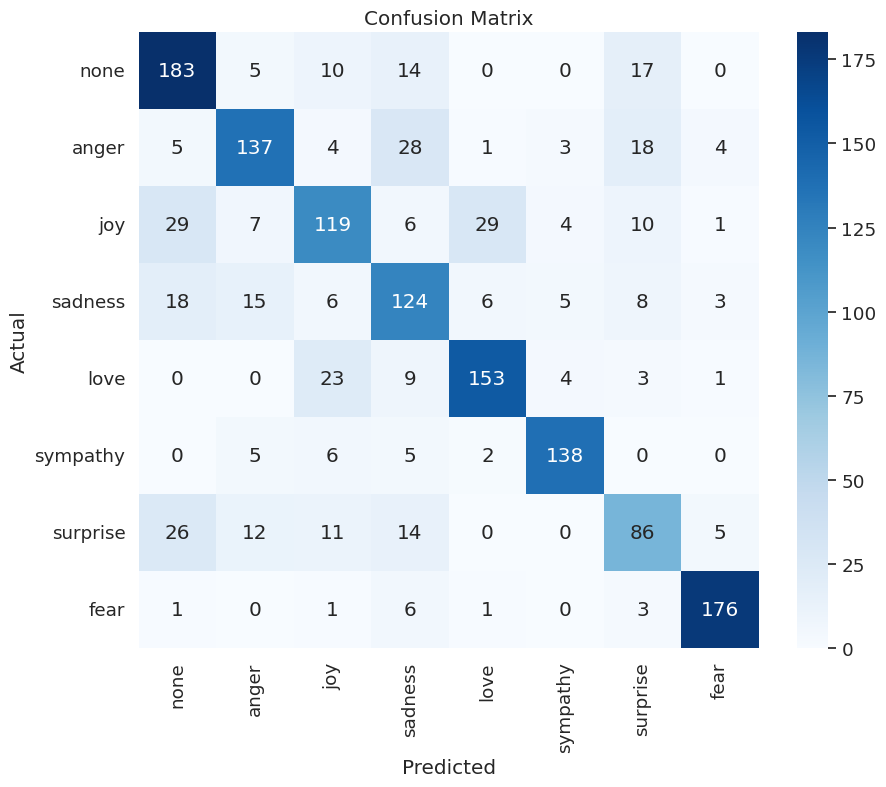

In [43]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(X_dev['label'], dev_pred)

plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()